In [1]:
import torch
import torch.nn  as nn 
import torch.nn.functional as F 
from torch.optim import SGD 

import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
## Model with optimize value

In [3]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)

    def forward(self,input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_outpur = top_relu_output * self.w01

        # bottom neuron layer
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_outpur + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

In [4]:
input_dose = torch.linspace(start=0, end=1, steps=11)
input_dose

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [5]:
model = BasicNN()

output_values = model(input_dose)

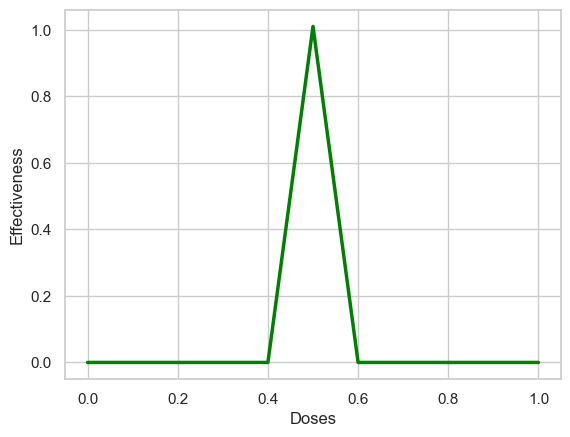

In [10]:
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x=input_dose,
             y=output_values,
             color='green',
             linewidth=2.5)
ax.set(xlabel='Doses', ylabel='Effectiveness')
plt.show()

In [13]:
# Optimization train

class BasicNN_train(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad=True)

    def forward(self,input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_outpur = top_relu_output * self.w01

        # bottom neuron layer
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_outpur + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

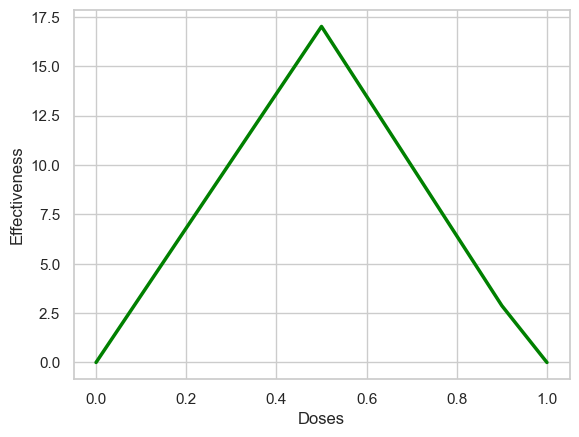

In [15]:
model = BasicNN_train()

output_values = model(input_dose)

sns.set_theme(style='whitegrid')

ax = sns.lineplot(x=input_dose,
                  y=output_values.detach(),
                  color='green',
                  linewidth=2.5)
ax.set(xlabel='Doses', ylabel='Effectiveness')
plt.show()


In [16]:
inputs = torch.tensor([0.,0.5,1.])
labels = torch.tensor([0.,1.,0.])

In [23]:
optimizer = SGD(model.parameters(),lr=0.1)
print(" Final bias, Before optimization:", str(model.final_bias.data) + '\n')

for epoch in range(100):

    total_loss = 0

    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]

        output_i = model(input_i)

        loss = (output_i - label_i)**2
        loss.backward()

        total_loss += float(loss)

    while total_loss < 0.0001:
        print("Num step:" + str(epoch))
        break

    optimizer.step()
    optimizer.zero_grad()

    print("step:" + str(epoch) + "Final Bias:" + str(model.final_bias) + '\n')
    print('Final bias, after optimization: ' + str(model.final_bias.data))


 Final bias, Before optimization: tensor(-16.0100)

Num step:0
step:0Final Bias:Parameter containing:
tensor(-16.0100, requires_grad=True)

Final bias, after optimization: tensor(-16.0100)
Num step:1
step:1Final Bias:Parameter containing:
tensor(-16.0100, requires_grad=True)

Final bias, after optimization: tensor(-16.0100)
Num step:2
step:2Final Bias:Parameter containing:
tensor(-16.0100, requires_grad=True)

Final bias, after optimization: tensor(-16.0100)
Num step:3
step:3Final Bias:Parameter containing:
tensor(-16.0100, requires_grad=True)

Final bias, after optimization: tensor(-16.0100)
Num step:4
step:4Final Bias:Parameter containing:
tensor(-16.0100, requires_grad=True)

Final bias, after optimization: tensor(-16.0100)
Num step:5
step:5Final Bias:Parameter containing:
tensor(-16.0100, requires_grad=True)

Final bias, after optimization: tensor(-16.0100)
Num step:6
step:6Final Bias:Parameter containing:
tensor(-16.0100, requires_grad=True)

Final bias, after optimization: tensor

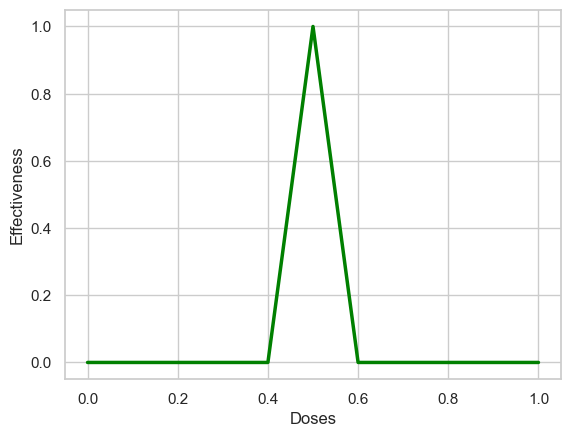

In [24]:
output_values = model(input_dose)

sns.set_theme(style='whitegrid')

ax = sns.lineplot(x=input_dose,
                  y=output_values.detach(),
                  color='green',
                  linewidth=2.5)
ax.set(xlabel='Doses', ylabel='Effectiveness')
plt.show()